<a href="https://colab.research.google.com/github/YayunEldina/PEMB_MESIN_Ganjil_2024/blob/main/Jobsheet_4_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**JOBSHEET 4 KLASIFIKASI**

- Nama    : Yayun Eldina
- Nim     : 2241720065
- Kelas   : Teknik Informatika - 3F
- No.Abs  : 27

**PRAKTIKUM 1**

**1. Klasifikasi SVM dengan Data Dummy**

In [6]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Menampilkan model generative

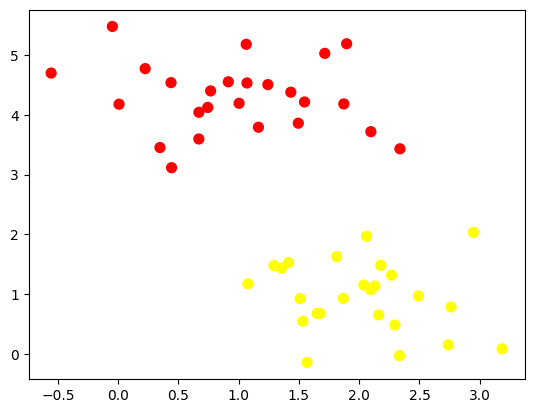

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Model klasifikasi membuar garis pemisah dat dari buah himpunan

(-1.0, 3.5)

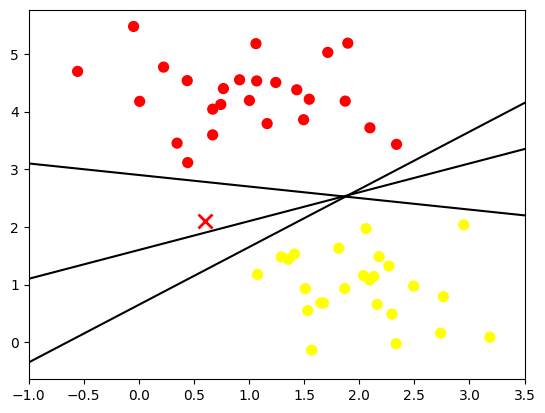

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Menentukan  garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu menggunakan data baru 'x'

(-1.0, 3.5)

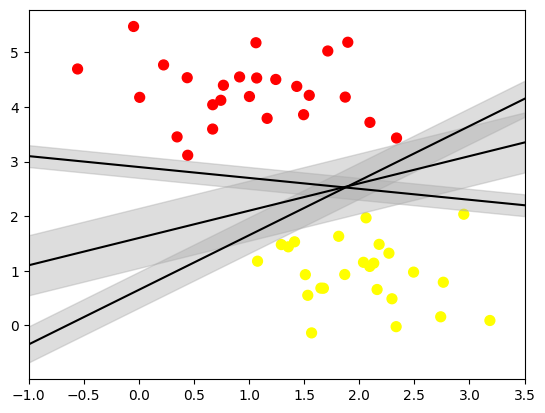

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

**2. Penerapan Fitting SVM**

In [10]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Menampilkan fitting data

In [11]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

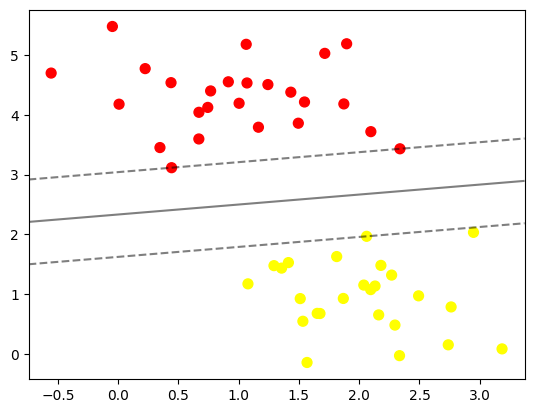

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Mengecek data yang masuk dalam support vector

In [13]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

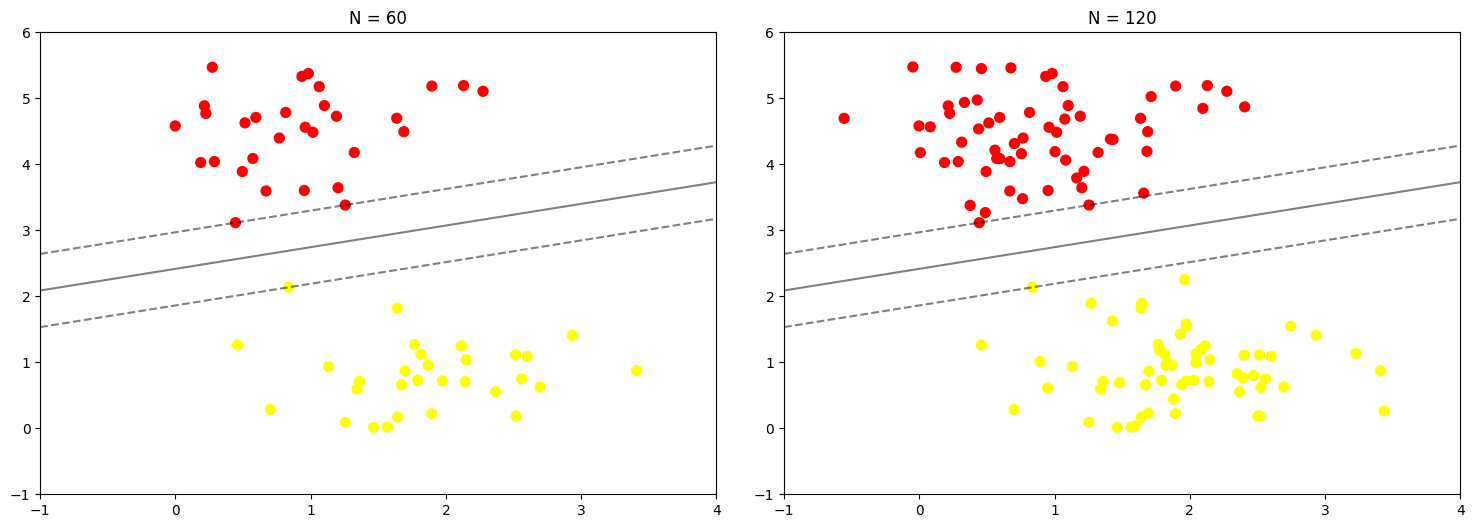

In [14]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**3. Data Tidak Terpisah Secara Linier**

Melakukan fitting pada hubungan nonlinear dengan sebuah classifier linier menggunakan kernel

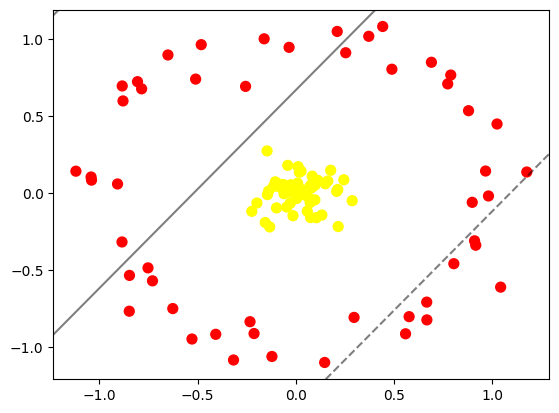

In [15]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [17]:
r = np.exp(-(X ** 2).sum(1))

Mengubah model 2D menjadi plot visualisasi model 3D

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.05775552, -0.11628523],
       [-0.03461673,  0.94889273],
       [-0.11504013,  0.04271647],
       [ 0.80347408, -0.45784312],
       [-0.72943666, -0.56932207],
       [-0.03761898,  0.00719864],
       [ 0.21306563,  0.02471662],
       [-0.2128356 , -0.91195123],
       [-0.50989113,  0.74243207],
       [-0.02853973, -0.06411474],
       [ 0.00360584, -0.03425127],
       [-0.8834121 ,  0.69783665],
       [ 0.00402576,  0.02164245],
       [ 0.87822171,  0.53696635],
       [-0.48147691,  0.96635269],
       [-0.31722142, -1.08393765],
       [-0.16143289,  1.00438099],
       [-0.2559542 ,  0.69505015],
       [ 0.91487984, -0.33762138],
       [-0.04135884,  0.18167041],
       [-0.06285704,  0.05650981],
       [-0.02605436,  0.05580646],
       [ 0.78781676,  0.76881618],
       [-0.13898216,  0.01398831],
       [ 0.44154874,  1.08457461],
       [-1.03962472,  0.08556973],
       [ 0.17705569,  0.14961739],
       [-0.75222854, -0.48499165],
       [ 0.07985675,  0.03565739],
       [-0.5285765 , -0.94755195],
       [ 0.97970069, -0.01748137],
       [-0.13334008, -0.21860782],
       [ 0.07470564, -0.15759559],
       [ 0.02611134,  0.14381324],
       [-0.4076713 , -0.91691259],
       [-0.06062633, -0.00270728],
       [-0.15586303, -0.19019303],
       [ 0.3707119 ,  1.0207264 ],
       [-1.04178856,  0.10599305],
       [ 1.02314499,  0.45048068],
       [ 0.06108655, -0.02261645],
       [ 0.20757129,  0.0124762 ],
       [-1.11905057,  0.14372025],
       [ 1.17459176,  0.13832711],
       [ 0.90888212, -0.30914998],
       [ 0.2864503 , -0.04808979],
       [ 0.96494756,  0.14468978],
       [-0.78468755,  0.67920517],
       [-0.12188772, -1.0611102 ],
       [-0.04633926, -0.08966072],
       [-0.90722287,  0.0605844 ],
       [-0.14467095, -0.00879345],
       [ 0.66556096, -0.70752279],
       [-0.22426403, -0.11733728],
       [ 0.07249568, -0.06016767],
       [-0.10496041,  0.07438305],
       [ 0.8969872 , -0.05875647],
       [ 0.0890573 ,  0.07020941],
       [ 0.66630042, -0.82315137],
       [ 0.6894308 ,  0.85182926],
       [ 0.21016953,  1.05223081],
       [-0.19828368, -0.06316202],
       [ 0.09653148, -0.04260969],
       [ 0.55784896, -0.91359504],
       [ 0.2438597 ,  0.08790135],
       [ 0.0971964 ,  0.05273925],
       [ 0.11288681,  0.08356178],
       [-0.1466738 ,  0.2755189 ],
       [ 0.07621074,  0.05292537],
       [ 0.29595366, -0.80708365],
       [ 0.08302526,  0.11123513],
       [ 0.25340198,  0.91381311],
       [-0.8475367 , -0.76678662],
       [-0.01474514, -0.14588921],
       [ 0.01135996,  0.1729598 ],
       [-0.80558528,  0.72566454],
       [-0.62617793, -0.74961025],
       [ 0.04232606, -0.00886017],
       [ 0.00866955,  0.06549157],
       [ 0.14635541, -1.10010825],
       [-0.07813438,  0.03832983],
       [-0.08124119,  0.05785096],
       [ 0.07086506,  0.04233866],
       [-0.88447588, -0.31652797],
       [-0.09850211, -0.09506478],
       [ 0.57596784, -0.80218633],
       [ 0.2150702 , -0.21624456],
       [ 1.04154534, -0.61026291],
       [ 0.01745207,  0.13699362],
       [ 0.16216959,  0.0798386 ],
       [-0.87941186,  0.60046775],
       [ 0.02850992,  0.02412169],
       [-0.84647493, -0.53396053],
       [ 0.13198358, -0.1414071 ],
       [-0.65084416,  0.89930959],
       [ 0.77234933,  0.71133167],
       [ 0.10380965, -0.15873704],
       [ 0.14943304,  0.06193095],
       [-0.23335386, -0.8350534 ],
       [ 0.48834948,  0.80661745]]), y=array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0]))>

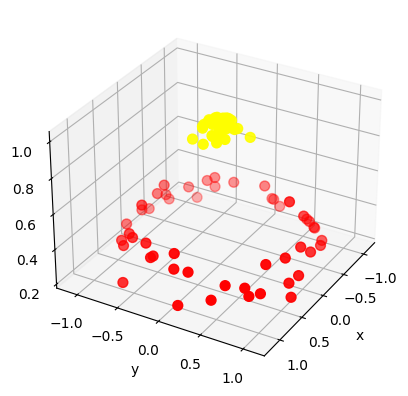

In [18]:
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20, 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [19]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

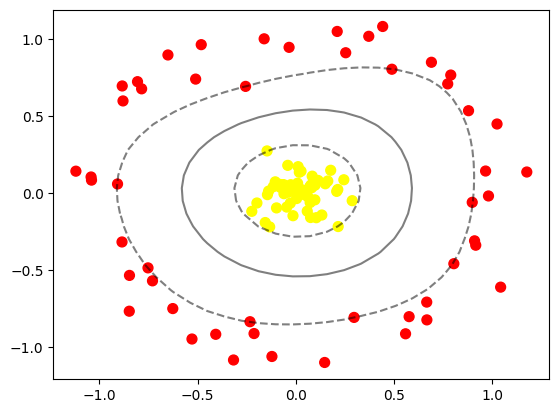

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

**4. Data Overlap**

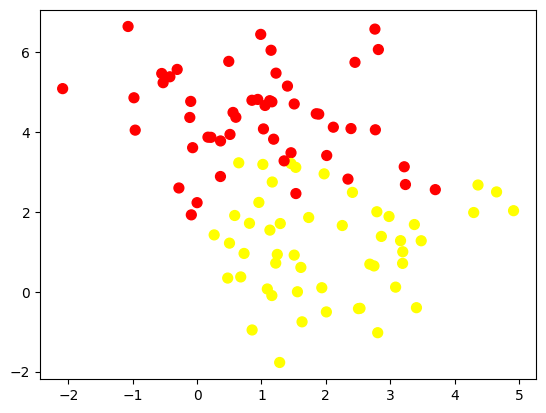

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Menerapkan fungsi SVM yang berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C)

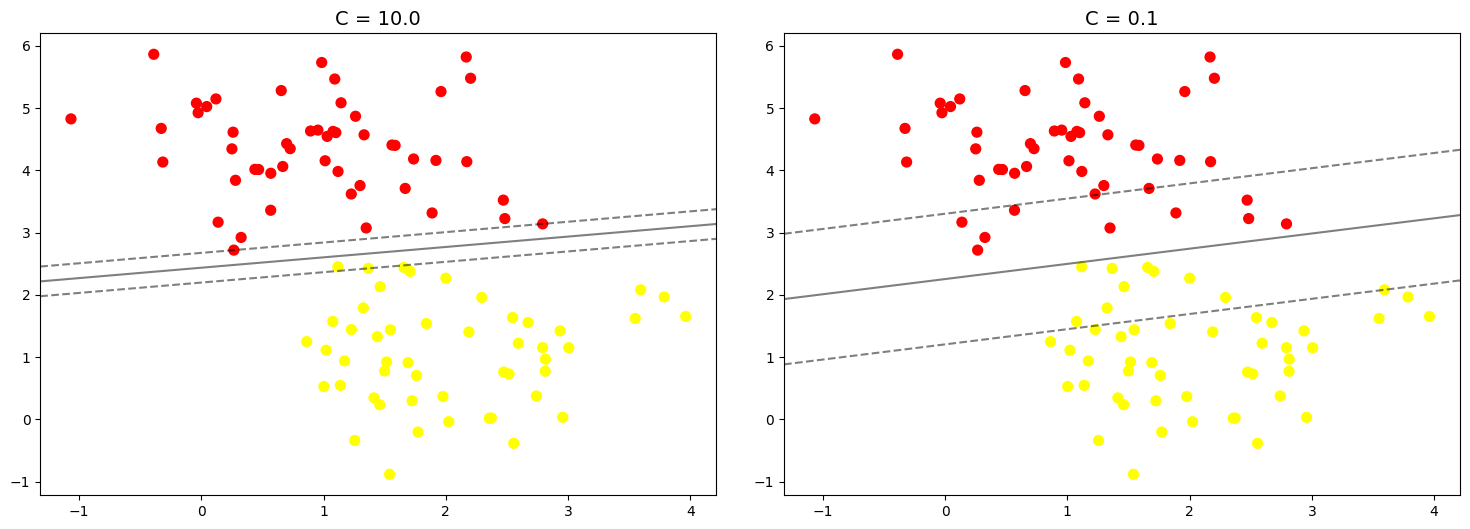

In [22]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

**PRAKTIKUM 2**

**1. Klasifikasi SVM Pada Data Citra**

In [23]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


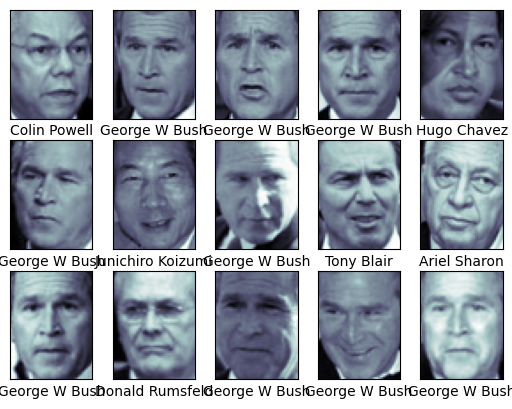

In [24]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [25]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Pemisahan data training dan data testing

In [26]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 45s, sys: 26.2 s, total: 2min 11s
Wall time: 1min 37s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


Prediksi label untuk data testing

In [29]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

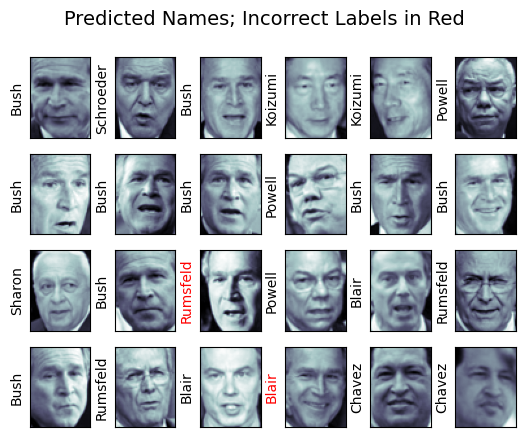

In [30]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [31]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

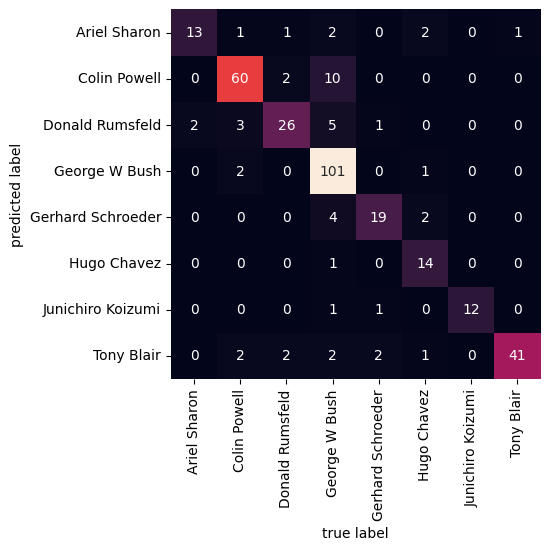

In [32]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

**PRAKTIKUM 5 - Klasifikasi Citra Siang dan Malam**

**Langkah 0 - Import Library**

In [1]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive

#Accesing my Goggle Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Image directories
train_dir = "/content/drive/MyDrive/ML_2024/images/images/training/"
test_dir = "/content/drive/MyDrive/ML_2024/images/images/test/"

**Langkah 1 - Load Data dan Visualisasikan**

Melakukan fungsi untuk membuat daftar seluruh path dari gambar.

In [4]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training

In [5]:
# Load training data
train_img = load_dataset(train_dir)

Melakukan pengecekan pada salah satu data pada list. Dengan list berisi tuple dengan dua data, yaitu data gambar dan label dari gambar

In [6]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [135, 131, 120],
         [123, 119, 108],
         [146, 142, 131]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [140, 136, 125],
         [133, 129, 118],
         [145, 141, 130]],
 
        [[254, 254, 254],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [144, 140, 129],
         [144, 140, 129],
         [149, 145, 134]],
 
        ...,
 
        [[ 81,  75,  75],
         [ 67,  63,  62],
         [ 49,  43,  43],
         ...,
         [ 56,  59,  68],
         [ 61,  64,  73],
         [ 68,  71,  80]],
 
        [[ 76,  72,  71],
         [ 60,  56,  55],
         [ 47,  43,  42],
         ...,
         [ 83,  86,  95],
         [ 65,  68,  77],
         [ 70,  73,  82]],
 
        [[114, 113, 111],
         [ 79,  78,  76],
         [ 75,  74,  72],
         ...,
         [ 64,  67,  76],
  

Melakukan pengecekan gambar secara acak

In [7]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 101
(737, 1024, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [8]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Melakukan visualisasi gambar secara acak

Shape	: (700, 1280, 3)
Label	: day


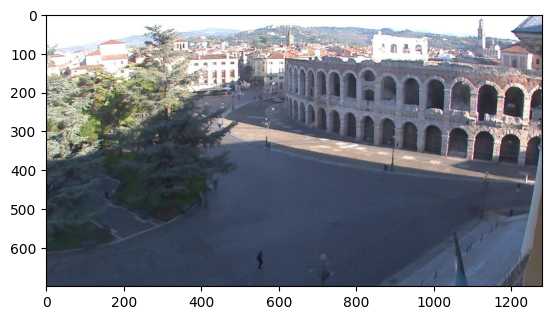

In [9]:
random_img_viz(train_img)

**Langkah 3 - Pra Pengelolaan Data**

Melakukan fungsi menstandarkan ukuran gambar

In [10]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Membuat fungsi kebutuhan encoding label

In [11]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Membuat fungsi untuk melakukan kedua hal tersebut secara langsung untuk semua gambar

In [12]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Melakukan pra pengelolaan data pada data training

In [13]:
train_std_img_list = preprocess(train_img)

Lakukan pengecekan ukuran gambar secara acak


In [14]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 137
(600, 1100, 3)


Melakukan inspeksi visual dengan fungsi random_img_viz

Shape	: (600, 1100, 3)
Label	: 1


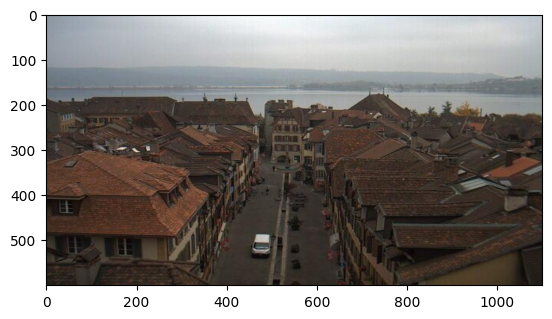

In [15]:
random_img_viz(train_std_img_list)

**Langkah 4 - Ekstraksi Fitur**

Menampilkan nilai rata-rata tingkat kecerahan

In [16]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Lakukan pengecekan pada gambar secara acak. INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!

Image 4
Avg Brighness: 112.9482


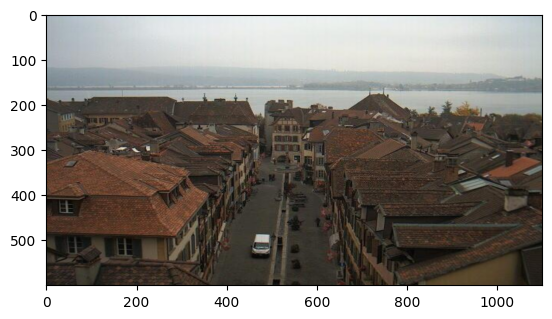

In [17]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

**Langkah 5 - Klasifikasi dengan Metode Threshold**

Melakukan proses klasifikasi sederhana

In [18]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Melakukan pengecekan prediksi secara acak pada data training

Image 38
Actual label: 1
Predicted label: 1


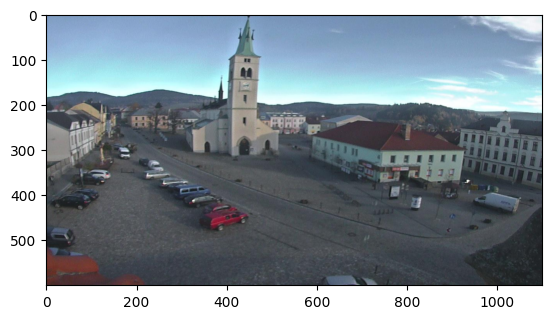

In [19]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

**Langkah 6 - Evalusi (Manual)**

Melakukan fungsi evaluasi model sederhana, yaitu dengan membangdingkan label yang diprediksi benar dengan seluruh data.

In [20]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Melakukan evaluasi pada data training dengan nilai diatas batas 120

In [21]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Melakukan evaluasi pada data testing

In [22]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


**Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM**

**Langkah 4 alternatif - Membuat Feature Vectors**

Melakukan tabulasi nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel

In [23]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

Melakukan pengecekan pada data training

In [24]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,142.108167,1.0
1,124.093436,1.0
2,127.998211,1.0
3,126.716241,1.0
4,112.948195,1.0


Melakukan langkah serupa pada data testing

In [25]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,185.917073,1.0
1,140.618388,1.0
2,161.989627,1.0
3,125.678882,1.0
4,107.579145,1.0


**Langkah 5 alternatif**

Membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [26]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

**Langkah 6 alternatif**

Melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [27]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


**TUGAS 2**

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.